# Importy

In [44]:
import pandas as pd
import numpy as np
import random as random
# plot
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
keras = tf.keras
#preprocessing
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#modelování
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
#import pickle
#vyhodnocení
#from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Načíst data

In [45]:
# prompt: open file
# import os
# cesta = os.path.join(os.path.dirname(__file__), 'jena_climate_3Q_2016.csv')
# print(cesta)
# with open(cesta, 'r') as file:

with open('jena_climate_3Q_2016.csv', 'r') as file:
  df = file.read(1200)
  print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'jena_climate_3Q_2016.csv'

In [3]:
# data ze souboru jena_climate_2009_2016.csv do datasetu - příliš pomalé pro vývoj a zpracování, proto jen 3Q 2016
#df = pd.read_csv('jena_climate_2009_2016.csv')
df = pd.read_csv('jena_climate_3Q_2016.csv')
df.head(10)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.07.2016 00:00:00,988.99,17.98,292.06,13.45,74.8,20.65,15.44,5.20,9.77,15.62,1176.38,0.60,1.18,55.77
1,01.07.2016 00:10:00,988.96,17.81,291.90,13.59,76.3,20.43,15.59,4.84,9.86,15.76,1176.97,0.63,1.12,76.50
2,01.07.2016 00:20:00,988.97,17.58,291.66,13.68,77.9,20.13,15.68,4.45,9.92,15.86,1177.87,1.06,1.76,134.10
3,01.07.2016 00:30:00,988.92,17.26,291.35,13.55,78.8,19.73,15.55,4.18,9.84,15.72,1179.17,0.97,1.88,200.50
4,01.07.2016 00:40:00,988.90,17.13,291.22,13.52,79.3,19.57,15.52,4.05,9.82,15.69,1179.68,0.87,1.20,207.10
5,01.07.2016 00:50:00,988.86,16.95,291.04,13.23,78.7,19.35,15.22,4.12,9.63,15.40,1180.50,1.24,3.00,225.40
6,01.07.2016 01:00:00,988.89,16.94,291.03,12.77,76.4,19.33,14.77,4.56,9.34,14.94,1180.78,1.81,2.76,228.40
7,01.07.2016 01:10:00,988.96,16.53,290.61,12.76,78.4,18.84,14.77,4.07,9.34,14.93,1182.54,0.82,1.76,217.10
8,01.07.2016 01:20:00,988.99,16.41,290.49,12.80,79.2,18.69,14.80,3.89,9.36,14.97,1183.05,1.03,1.48,238.00
9,01.07.2016 01:30:00,988.99,16.30,290.38,12.92,80.4,18.56,14.92,3.64,9.44,15.09,1183.44,0.81,1.16,220.80


# Preprocesing dat a vizualizace dat


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13249 entries, 0 to 13248
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date Time        13249 non-null  datetime64[ns]
 1   p (mbar)         13249 non-null  float64       
 2   T (degC)         13249 non-null  float64       
 3   Tpot (K)         13249 non-null  float64       
 4   Tdew (degC)      13249 non-null  float64       
 5   rh (%)           13249 non-null  float64       
 6   VPmax (mbar)     13249 non-null  float64       
 7   VPact (mbar)     13249 non-null  float64       
 8   VPdef (mbar)     13249 non-null  float64       
 9   sh (g/kg)        13249 non-null  float64       
 10  H2OC (mmol/mol)  13249 non-null  float64       
 11  rho (g/m**3)     13249 non-null  float64       
 12  wv (m/s)         13249 non-null  float64       
 13  max. wv (m/s)    13249 non-null  float64       
 14  wd (deg)         13249 non-null  float

In [5]:
# statistiky datasetu df
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000,13249.000000
mean,991.751025,18.591362,292.446065,12.076472,68.577459,22.443751,14.335920,8.107799,9.044646,14.458941,1178.103196,1.750309,3.038829,179.747375
std,4.319752,5.109068,5.225189,2.879192,17.644457,7.479681,2.658604,6.832285,1.698282,2.700316,23.046833,1.250263,1.993843,85.949524
min,982.240000,5.160000,278.790000,3.210000,23.640000,8.830000,7.690000,0.140000,4.820000,7.730000,1111.660000,0.100000,0.200000,0.200000
25%,988.290000,15.090000,288.970000,10.170000,53.790000,17.180000,12.430000,2.820000,7.810000,12.500000,1162.780000,0.820000,1.520000,127.600000
50%,991.620000,18.130000,291.980000,12.320000,70.600000,20.840000,14.350000,5.970000,9.050000,14.480000,1179.250000,1.430000,2.520000,201.200000
75%,995.030000,21.800000,295.740000,14.100000,83.500000,26.160000,16.120000,11.850000,10.180000,16.270000,1193.310000,2.360000,4.200000,241.700000
max,1001.830000,34.340000,308.430000,20.150000,98.800000,54.270000,23.640000,41.230000,14.980000,23.870000,1242.730000,9.100000,13.830000,360.000000


In [6]:
# test převodu na DateTime
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13249 entries, 0 to 13248
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date Time        13249 non-null  datetime64[ns]
 1   p (mbar)         13249 non-null  float64       
 2   T (degC)         13249 non-null  float64       
 3   Tpot (K)         13249 non-null  float64       
 4   Tdew (degC)      13249 non-null  float64       
 5   rh (%)           13249 non-null  float64       
 6   VPmax (mbar)     13249 non-null  float64       
 7   VPact (mbar)     13249 non-null  float64       
 8   VPdef (mbar)     13249 non-null  float64       
 9   sh (g/kg)        13249 non-null  float64       
 10  H2OC (mmol/mol)  13249 non-null  float64       
 11  rho (g/m**3)     13249 non-null  float64       
 12  wv (m/s)         13249 non-null  float64       
 13  max. wv (m/s)    13249 non-null  float64       
 14  wd (deg)         13249 non-null  float

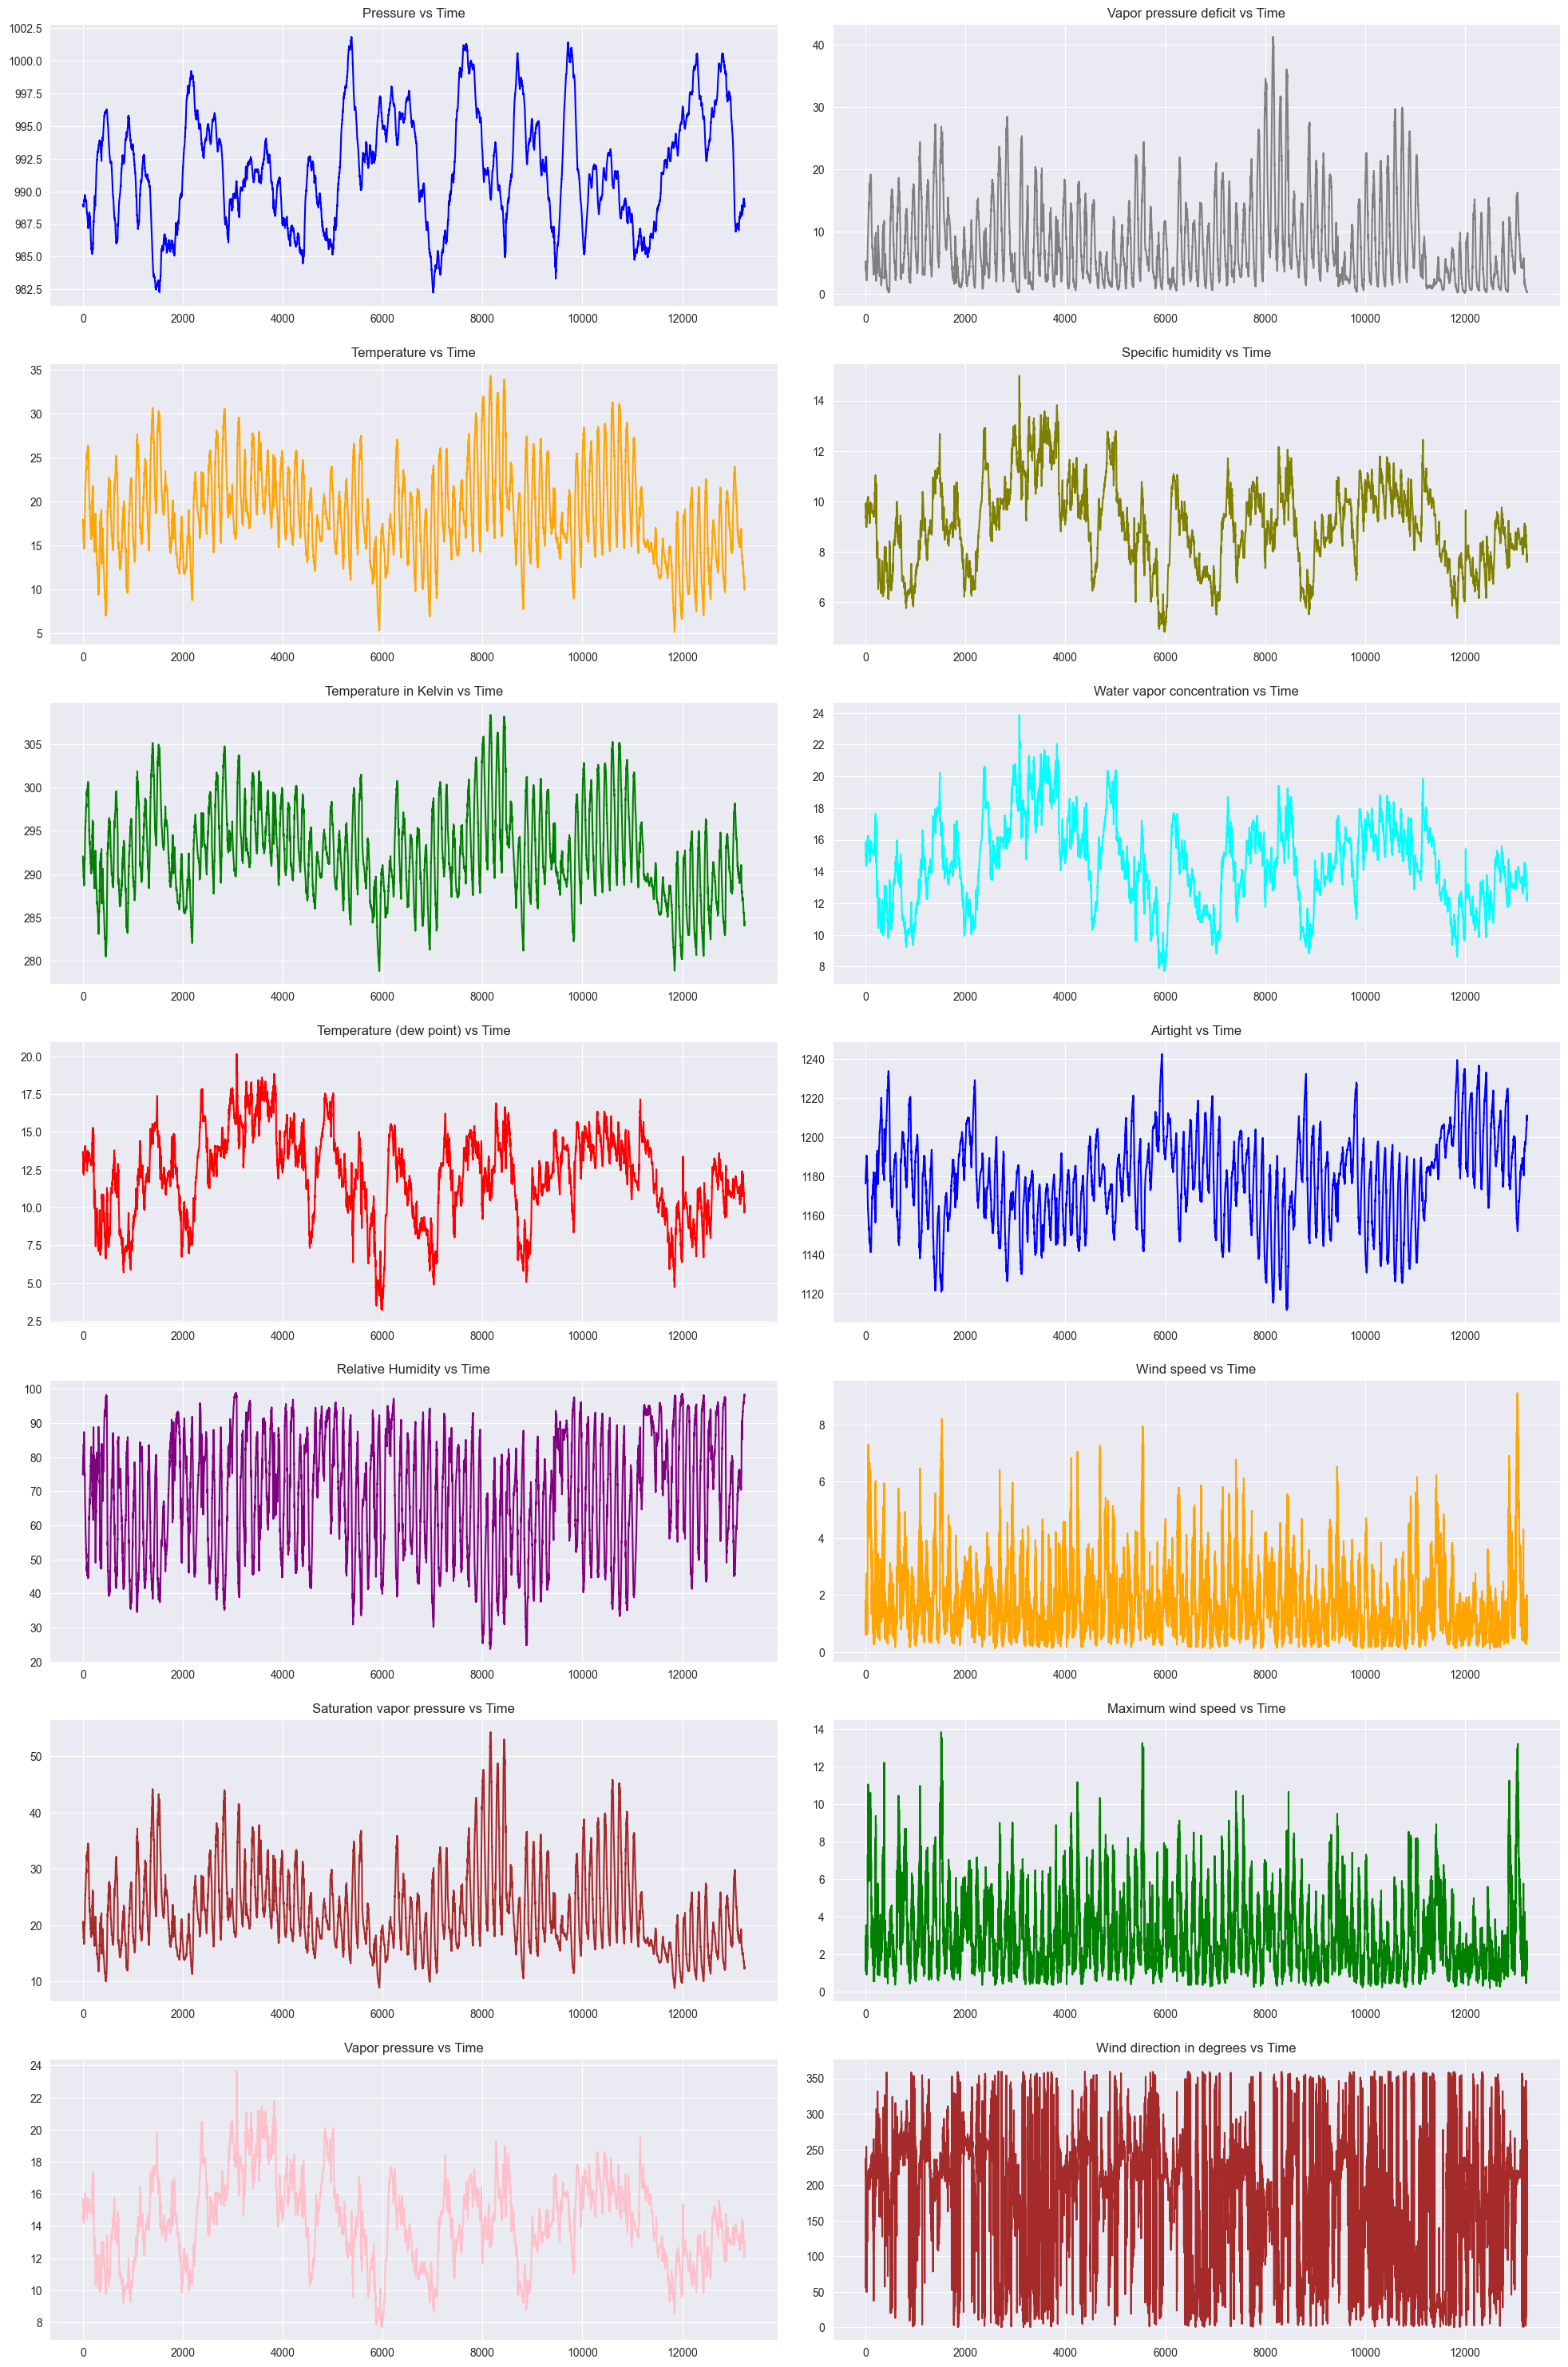

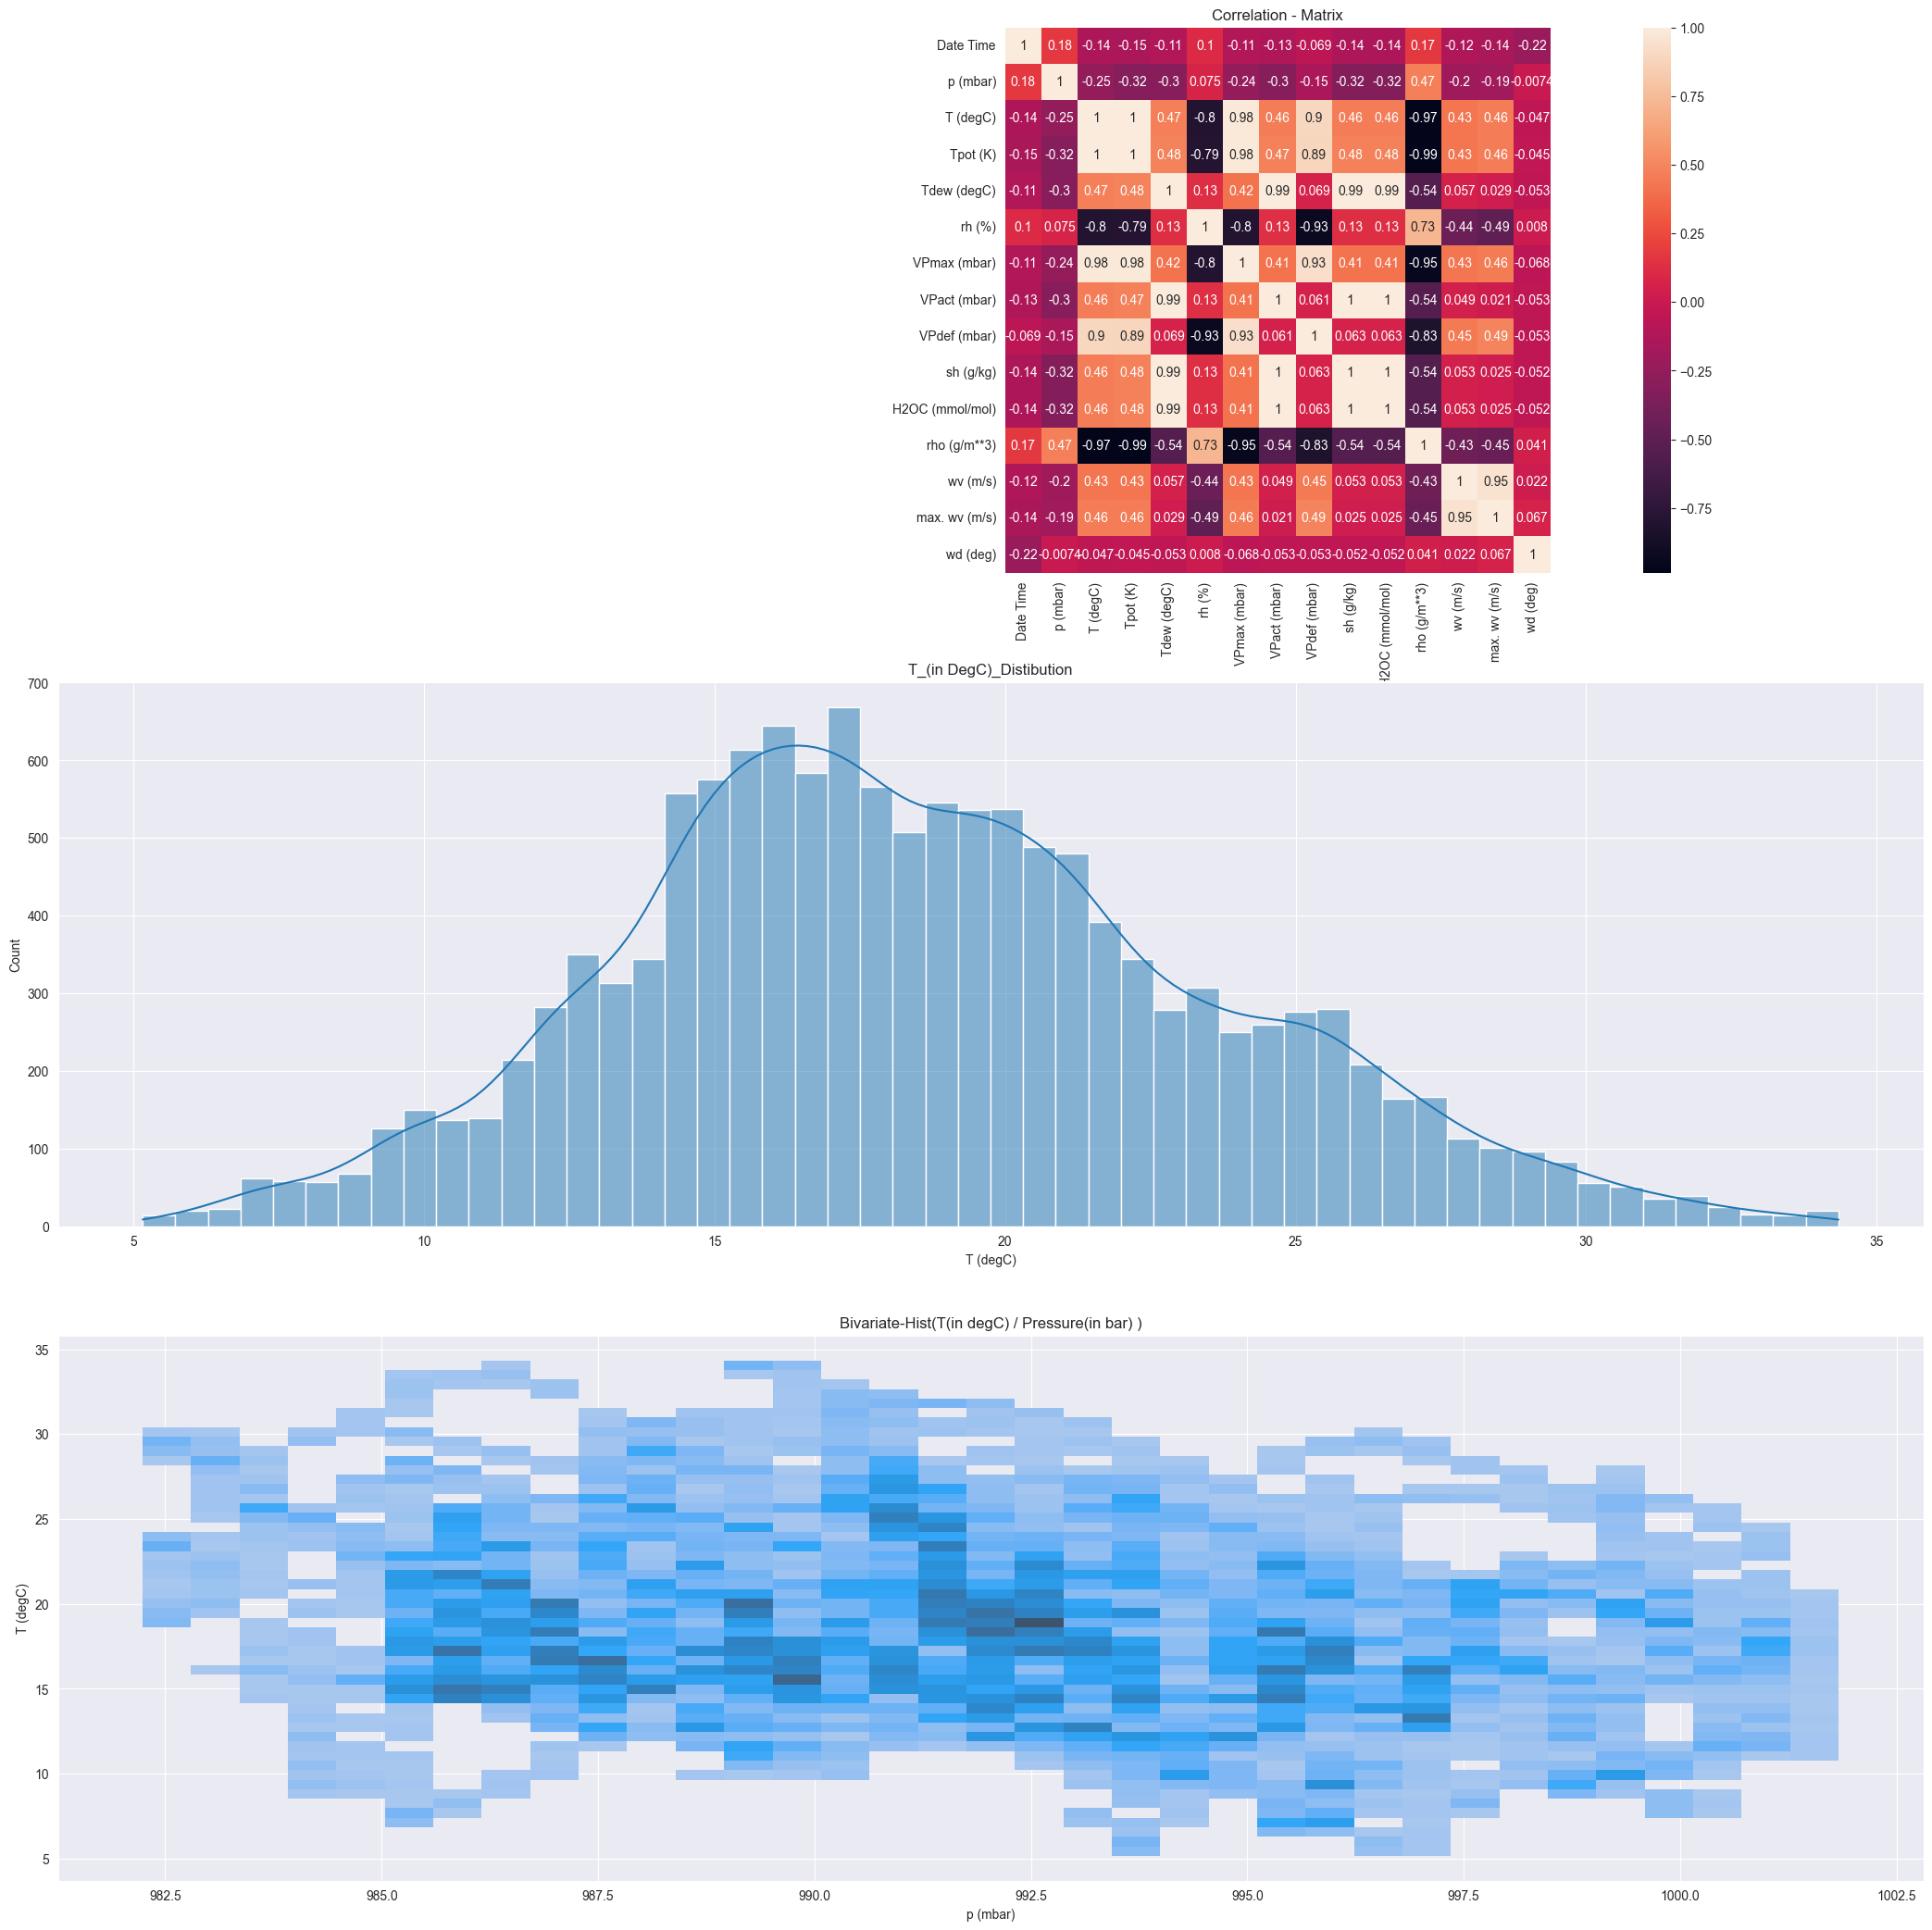

In [7]:
all_cols = df.columns
sns.set_style('darkgrid')
fig, axs = plt.subplots(7, 2, figsize=(20,30))

titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "brown",
]

for i in range(len(titles)):

    if i<= 6:
        axs[i,0].set_title(f'{titles[i]} vs Time');
        axs[i,0].plot(range(len(df[all_cols[0]])), df[all_cols[i+1]],c = colors[i])
    if i > 6:
        axs[i-7,1].set_title(f'{titles[i]} vs Time');
        axs[i-7,1].plot(range(len(df[all_cols[0]])), df[all_cols[i+1]],c = colors[i])


plt.tight_layout(pad=2)
plt.show()

fig, ax = plt.subplots(3,1, figsize = (26,26))

# Convert 'Date Time' column to datetime objects
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Extract relevant features from datetime
# df['Day'] = df['Date Time'].dt.day
# df['Month'] = df['Date Time'].dt.month
# df['Year'] = df['Date Time'].dt.year
# df['Hour'] = df['Date Time'].dt.hour
# df['Minute'] = df['Date Time'].dt.minute

df_corr = df.corr()
ax[0].set_title('Correlation - Matrix')
sns.heatmap(df_corr, square=True, annot=True, ax=ax[0])

ax[1].set_title('T_(in DegC)_Distibution')
sns.histplot(df[all_cols[2]], ax = ax[1], kde =True)

ax[2].set_title('Bivariate-Hist(T(in degC) / Pressure(in bar) )')
sns.histplot(
    df, x=all_cols[1], y=all_cols[2],
    discrete=(False, False), log_scale=(False, False), ax= ax[2]
)

plt.show()

In [8]:
# null hodnoty v datasetu df
df.isnull().sum()
#df[df.isnull().any(axis=1)].groupby("T (degC)")["type"].count()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

0       17.98
1       17.81
2       17.58
3       17.26
4       17.13
        ...  
1435    23.15
1436    22.84
1437    22.26
1438    22.14
1439    21.91
Name: T (degC), Length: 1440, dtype: float64


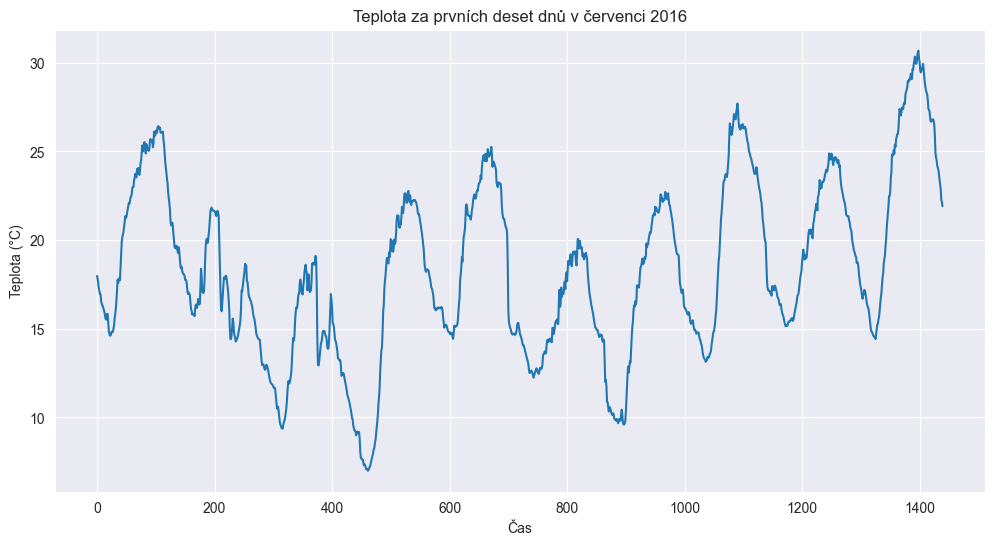

In [9]:
# graf závislosti teploty na čase za deset dnů
import matplotlib.pyplot as plt

temp = df['T (degC)'][:1440]
print(temp)

plt.figure(figsize=(12, 6))
plt.plot(temp)
plt.xlabel('Čas')
plt.ylabel('Teplota (°C)')
plt.title('Teplota za prvních deset dnů v červenci 2016')
plt.show()


0       17.98
1       17.81
2       17.58
3       17.26
4       17.13
        ...  
4459    15.40
4460    15.28
4461    15.12
4462    14.95
4463    14.78
Name: T (degC), Length: 4464, dtype: float64


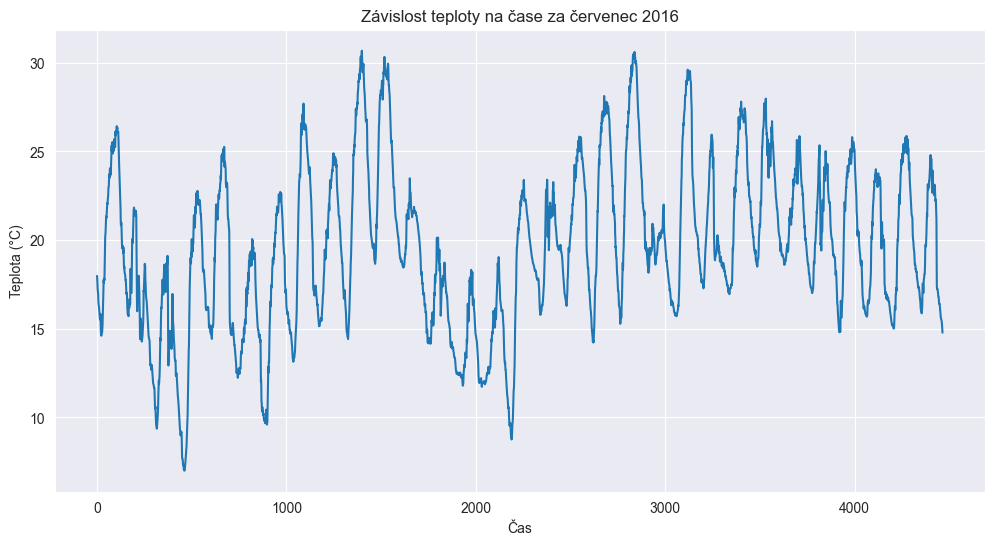

In [10]:
temp = df['T (degC)'][:4464]
print(temp)

plt.figure(figsize=(12, 6))
plt.plot(temp)
plt.xlabel('Čas')
plt.ylabel('Teplota (°C)')
plt.title('Závislost teploty na čase za červenec 2016')
plt.show()

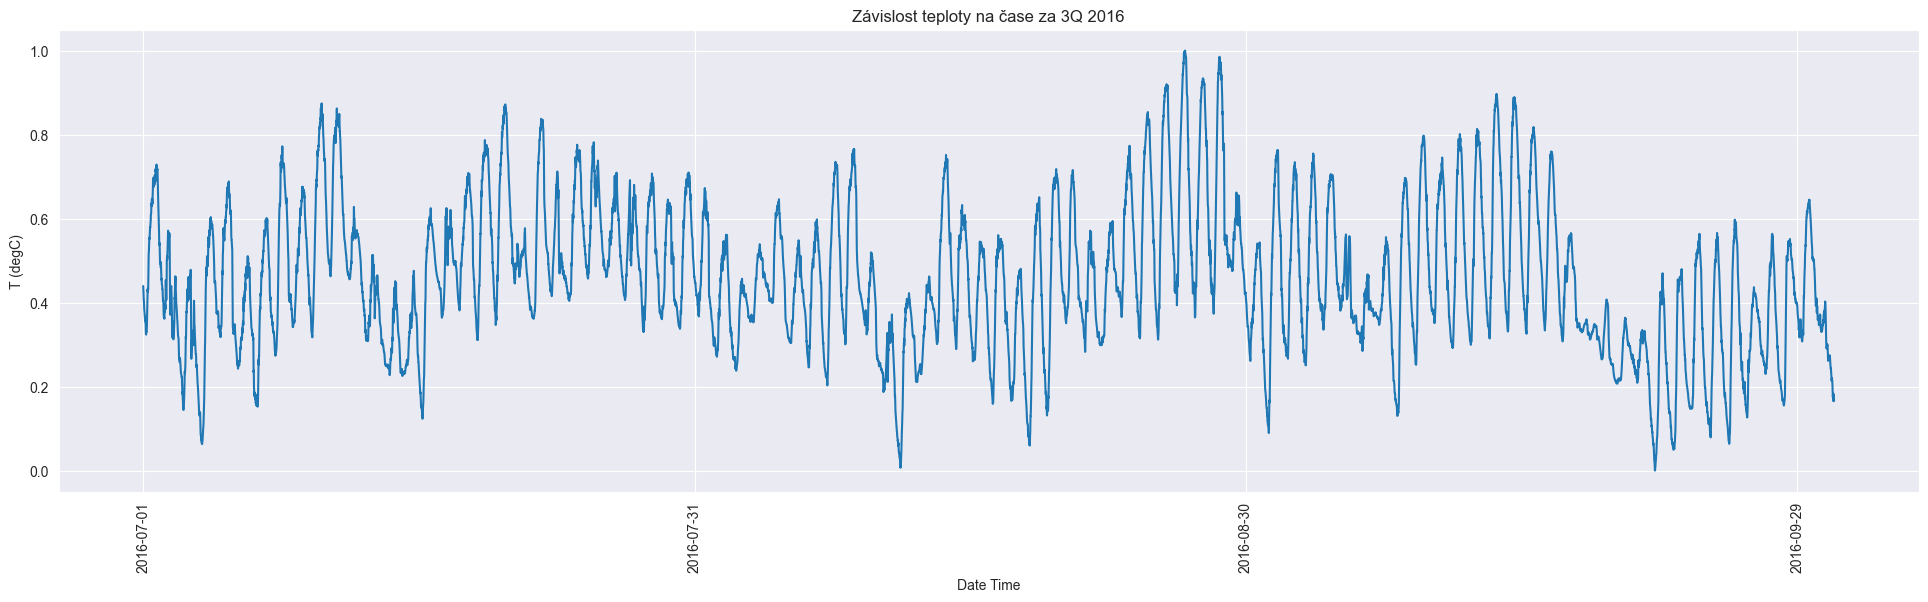

In [42]:
# nakresli graf závislosti [T (degC)] na [Date Time]

import matplotlib.pyplot as plt

# Vyberte sloupce pro graf
# x = df['Date Time'][:52558]
# y = df['T (degC)'][:52558]
x = df['Date Time']
y = df['T (degC)']

# Vytvořte graf
plt.figure(figsize=(24, 6))
plt.plot(x, y)
plt.xlabel('Date Time')
plt.ylabel('T (degC)')
plt.title('Závislost teploty na čase za 3Q 2016')
plt.xticks(x[::4320],rotation=90)  # Otočte popisky na ose x pro lepší čitelnost
plt.show()


In [12]:
# Normalizace sloupce 'T (degC)'
# print(df['T (degC)'])
# print(df['T (degC)'].min())
# print(df['T (degC)'].max())

df['T (degC)'] = (df['T (degC)'] - df['T (degC)'].min()) / (df['T (degC)'].max() - df['T (degC)'].min())
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2016-07-01 00:00:00,988.99,0.439342,292.06,13.45,74.8,20.65,15.44,5.20,9.77,15.62,1176.38,0.60,1.18,55.77
1,2016-07-01 00:10:00,988.96,0.433516,291.90,13.59,76.3,20.43,15.59,4.84,9.86,15.76,1176.97,0.63,1.12,76.50
2,2016-07-01 00:20:00,988.97,0.425634,291.66,13.68,77.9,20.13,15.68,4.45,9.92,15.86,1177.87,1.06,1.76,134.10
3,2016-07-01 00:30:00,988.92,0.414668,291.35,13.55,78.8,19.73,15.55,4.18,9.84,15.72,1179.17,0.97,1.88,200.50
4,2016-07-01 00:40:00,988.90,0.410212,291.22,13.52,79.3,19.57,15.52,4.05,9.82,15.69,1179.68,0.87,1.20,207.10
5,2016-07-01 00:50:00,988.86,0.404044,291.04,13.23,78.7,19.35,15.22,4.12,9.63,15.40,1180.50,1.24,3.00,225.40
6,2016-07-01 01:00:00,988.89,0.403701,291.03,12.77,76.4,19.33,14.77,4.56,9.34,14.94,1180.78,1.81,2.76,228.40
7,2016-07-01 01:10:00,988.96,0.389650,290.61,12.76,78.4,18.84,14.77,4.07,9.34,14.93,1182.54,0.82,1.76,217.10
8,2016-07-01 01:20:00,988.99,0.385538,290.49,12.80,79.2,18.69,14.80,3.89,9.36,14.97,1183.05,1.03,1.48,238.00
9,2016-07-01 01:30:00,988.99,0.381768,290.38,12.92,80.4,18.56,14.92,3.64,9.44,15.09,1183.44,0.81,1.16,220.80


In [21]:
#from tensorflow import keras
from keras import layers

# Vytvoření sekvence čísel
int_sequence = np.arange(10)

# Vytvoření časové řady datového souboru
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

#Iterace přes datový soubor a tisk vstupů a cílů

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

# Definice modelu
model = keras.Sequential([
    layers.LSTM(10, activation='relu', input_shape=(3, 1)),
    layers.Dense(1)
])

# Kompilace modelu
model.compile(optimizer='adam', loss='mse')

# Příprava dat pro trénování
X = []
y = []
for inputs, targets in dummy_dataset:
    X.extend(inputs)
    y.extend(targets)

X = np.array(X)
y = np.array(y)

# Reshape vstupních dat pro LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Trénování modelu
model.fit(X, y, epochs=200, verbose=0)

# Předpověď
predictions = model.predict(X, verbose=0)
for i in range(len(X)):
    print(f"Vstup: {X[i].flatten()}, Skutečný cíl: {y[i]}, Předpověď: {predictions[i][0]}")

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7
Vstup: [0 1 2], Skutečný cíl: 3, Předpověď: 1.358494520187378
Vstup: [1 2 3], Skutečný cíl: 4, Předpověď: 2.5629770755767822
Vstup: [2 3 4], Skutečný cíl: 5, Předpověď: 4.113725185394287
Vstup: [3 4 5], Skutečný cíl: 6, Předpověď: 5.9398603439331055
Vstup: [4 5 6], Skutečný cíl: 7, Předpověď: 7.943089962005615


**Model**

# Dummy model jako reference

In [47]:
# def predict(seed, x_test, yreal):
#     c = seed
#     kx = x_test[c,:,1].tolist() ## every 120/seq_length time-steps / point is going to have a single future point (here T in C on of the the given features)
#     pred = model.predict(x_test)
#     ky = yreal[c]
#     x_lin = range(len(kx))
#     plt.plot(x_lin, kx, '.-b', label = 'Test_data_past' )
#     plt.plot(x_lin[-1]+1, ky, 'kx', label = 'Real_point')
#     plt.plot(x_lin[-1]+1, pred[c], 'ro', label ='Predicted_point' )
#     plt.legend()
#     plt.xlabel('time')
#     plt.ylabel('Norm_Temp_(in DegC)')
#     plt.title('Prediction_on_Test_Data')
#     plt.show()

# batch_size = 128
# seed = 10
# num = 5

# x_test, yreal = next(test_gen)
# print('x-test: ', x_test.shape, 'yreal: ', yreal.shape)

# for _ in range(num):
#     seed = random.randint(0, batch_size-2)
#     predict(seed, x_test, yreal)

# RNN (Recurrent Neural Network) model

In [16]:
# Rekurentní neuronové sítě (RNN) jsou typem umělých neuronových sítí, které jsou navrženy pro zpracování sekvenčních dat.
# Na rozdíl od běžných neuronových sítí, které zpracovávají data v jednom průchodu, RNN zpracovávají data přes více časových kroků.
# To jim umožňuje uchovávat informace z předchozích vstupů a využívat je při aktuálním zpracování12.
# RNN jsou zvláště užitečné pro úlohy, kde je důležitý kontext a pořadí dat, jako je rozpoznávání řeči, zpracování přirozeného
# jazyka a predikce časových řad12.
# Existují různé typy RNN:

# 1. Jednoduché RNN: Základní forma RNN, která může trpět problémem mizejícího gradientu.
# 2. LSTM (Long Short-Term Memory): Typ RNN, který řeší problém mizejícího gradientu a je schopen uchovávat informace po delší dobu.
# 3. GRU (Gated Recurrent Unit): Podobné LSTM, ale s jednodušší strukturou


df_train = df[['p (mbar)','T (degC)', 'VPmax (mbar)', 'VPdef (mbar)', 'sh (g/kg)' ,'rho (g/m**3)',	'wv (m/s)']] #Selected Features

# převádí DataFrame df_train z knihovny pandas na numpy pole.
# Funkce to_numpy() je metoda pandas DataFrame, která vrací obsah DataFrame jako numpy pole.
# To může být užitečné, pokud chcete provádět numerické operace nebo trénovat modely strojového učení, které očekávají vstupní data ve formátu numpy pole.

data = df_train.to_numpy()
print(data.shape)

def norm(data):
    mean = data[:200000].mean(axis=0)
    data -= mean
    std = data[:200000].std(axis=0)
    data /= std

    return data

data = norm(data)
print(data.shape)

def gen(data, past, delay, minn, maxx, shuffle=False, batch_size=128, rate=6):
    if maxx is None:
        maxx = len(data) - delay -1
    i = minn + past
    while True:
        if shuffle:
            rows = np.random.randint(minn + past, maxx, size = batch_size)
        else:
            if i + batch_size > maxx:
                i = minn + past
            rows=np.arange(i, min(i + batch_size, maxx))
            i+=len(rows)

        samples = np.zeros((len(rows), past // rate, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - past, rows[j], rate) ## sample apoint every hour intead of every 10 mins
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

(13249, 7)
(13249, 7)


In [17]:
past = 720 ## ==>> looks 5 days back
rate = 6 ## ==>> sample 1 point every hour
delay = 144 ## ==>> predict after 1 day/24 hrs

train_split, test_split = 0.60, 0.25
train_max = round(train_split * data.shape[0])
val_max = (1-train_split)*data.shape[0]
test_max = round(test_split*val_max)
val_max = round(val_max - test_max)

val_steps =  (train_max+val_max) - (train_max+1) - past ## (-past) because no target values for last  720 points
test_steps = (train_max+val_max+test_max)-(train_max+val_max+1) - past

print('Train_Max: ',round(train_max),', Val_Max: ',round(val_max),', Test_Max: ',round(test_max))

train_gen = gen(data, past,delay, minn = 0, maxx = train_max, batch_size=128, shuffle=True)
val_gen = gen(data, past, delay, minn = train_max+1, maxx = train_max + val_max, batch_size=128)
test_gen = gen(data, past, delay, minn = train_max+val_max+1, maxx = train_max+val_max+test_max, batch_size=128)

Train_Max:  7949 , Val_Max:  3975 , Test_Max:  1325


In [18]:
def baseline(val_gen):
    maes = []
    for step, exe in enumerate(val_gen):
        samples, targets = exe
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds-targets))
        maes.append(mae)
        if step == 2000:
            break
    return np.mean(maes)

def visual_loss(hist, base_mae):
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(len(loss))
    sns.set_style('darkgrid')
    plt.figure()
    plt.plot(epochs, loss, "1-b", label="Training loss")
    plt.plot(epochs, val_loss, "1-r", label="Validation loss")
    plt.plot(epochs, base_mae*np.ones(len(loss)), 'k-', label = "CommonSense_Baseline_loss")
    plt.title('Loss_Curve')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [19]:
# vytváří a trénuje rekurentní neuronovou síť (RNN) s vrstvami GRU (Gated Recurrent Unit) pomocí TensorFlow a Keras
# vstupní vrstva
inp = tf.keras.layers.Input(shape = (past // rate, data.shape[-1]))
# přidává GRU vrstvu s 32 jednotkami, která vrací sekvence (return_sequences=True) s dropoutem 0.1 a recurrent dropoutem 0.3
gru_1 = tf.keras.layers.GRU(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.3)(inp)
# druhá GRU vrstva s 64 jednotkami a aktivací relu, s dropoutem 0.1 a recurrent dropoutem 0.3
gru_2 = tf.keras.layers.GRU(64, activation='relu',dropout=0.1, recurrent_dropout=0.3)(gru_1)
# přidává hustou vrstvu s jedním neuronem a lineární aktivací
dense = tf.keras.layers.Dense(1, activation='linear')(gru_2)
# vytváří model s definovanými vstupy a výstupy
model = tf.keras.models.Model(inputs = inp, outputs = dense)
# kompiluje model s funkcí ztráty mae (mean absolute error) a optimalizátorem Adam
model.compile(loss="mae", optimizer="Adam")
model.summary()
# definuje callback pro předčasné zastavení tréninku, pokud se validace ztráty nezlepší po 5 epochách
se = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5)
# steps_per_epoch
# number of batches passed during each epoch
# trénuje model na datech train_gen s 500 kroky na epochu, po dobu 5 epoch, s validací na datech val_gen a callbackem se
hist = model.fit(train_gen, steps_per_epoch=500, epochs=5, validation_data = val_gen, validation_steps= val_steps, callbacks=[se])
# vypočítá a vypíše baseline MAE (mean absolute error) pro validaci
base_mae = baseline(val_gen)
print('CommonSense_Baseline_MAE_normalized: ', base_mae)
print('CommonSense_Absoulte_MAE_(in degC)_baseline: ', base_mae*df[all_cols[2]].std(axis=0))
#visual_loss(hist, base_mae)
print()
print('--'*50)
print()
# vyhodnotí model na testovacích datech test_gen
x_t, y_t = next(test_gen)
print(model.evaluate(x_t, y_t))
print('--'*50)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 120, 7)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 120, 32)             │           3,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - loss: 91846676054016.0000

KeyboardInterrupt: 

# ARIMA (AutoRegressive Integrated Moving Average) model

In [1]:
# ARIMA (AutoRegressive Integrated Moving Average, AutoRegresivní integrovaný klouzavý průměr) je třída modelů časových řad,
# která se používá k analýze a předpovědi časových řad. Model ARIMA kombinuje tři klíčové komponenty:
# 1. Autoregrese (AR): Tato část modelu předpokládá, že současná hodnota časové řady závisí na předchozích hodnotách.
# Řád autoregresní složky se označuje jako ( p ).
# 2. Integrovaná složka (I): Tato složka se používá k dosažení stacionarity časové řady, což znamená,
# že časová řada má konstantní průměr a variabilitu v čase. Řád integrační složky se označuje jako ( d ).
# 3. Klouzavý průměr (MA): Tato část modelu předpokládá, že současná hodnota časové řady závisí na předchozích chybách předpovědi.
# Řád složky klouzavého průměru se označuje jako ( q ). Celkový model ARIMA je tedy označován jako ARIMA(( p, d, q ))

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Načtení dat
data = pd.read_csv('c:/Users/JiriK3/source/repos/Temperature_forecasting/jena_climate_3Q_2016.csv', parse_dates=['Date Time'], index_col='Date Time')
data.index = pd.to_datetime(data.index, format='%d.%m.%Y %H:%M:%S')
print('Výchozí frekvence dat: ', data.index.freq)
data = data.asfreq('10min')  # frekvence 10 minut
print('Nová frekvence dat: ', data.index.freq)
print()
temperature = data['T (degC)']
data.info()


Výchozí frekvence dat:  None
Nová frekvence dat:  <10 * Minutes>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13249 entries, 2016-07-01 00:00:00 to 2016-10-01 00:00:00
Freq: 10min
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         13249 non-null  float64
 1   T (degC)         13249 non-null  float64
 2   Tpot (K)         13249 non-null  float64
 3   Tdew (degC)      13249 non-null  float64
 4   rh (%)           13249 non-null  float64
 5   VPmax (mbar)     13249 non-null  float64
 6   VPact (mbar)     13249 non-null  float64
 7   VPdef (mbar)     13249 non-null  float64
 8   sh (g/kg)        13249 non-null  float64
 9   H2OC (mmol/mol)  13249 non-null  float64
 10  rho (g/m**3)     13249 non-null  float64
 11  wv (m/s)         13249 non-null  float64
 12  max. wv (m/s)    13249 non-null  float64
 13  wd (deg)         13249 non-null  float64
dtypes: float64(14)
memory usage: 1.5 MB


In [2]:
# Rozdělení dat
train_size = int(len(temperature) * 0.8)
train = temperature[:train_size]
test = temperature[train_size:]
print('Train: ', train)
print("\n" * 2)
print('Test: ', test)


Train:  Date Time
2016-07-01 00:00:00    17.98
2016-07-01 00:10:00    17.81
2016-07-01 00:20:00    17.58
2016-07-01 00:30:00    17.26
2016-07-01 00:40:00    17.13
                       ...  
2016-09-12 13:40:00    30.61
2016-09-12 13:50:00    30.44
2016-09-12 14:00:00    30.55
2016-09-12 14:10:00    30.79
2016-09-12 14:20:00    30.97
Freq: 10min, Name: T (degC), Length: 10599, dtype: float64



Test:  Date Time
2016-09-12 14:30:00    31.07
2016-09-12 14:40:00    31.09
2016-09-12 14:50:00    30.99
2016-09-12 15:00:00    30.95
2016-09-12 15:10:00    31.33
                       ...  
2016-09-30 23:20:00    10.26
2016-09-30 23:30:00    10.44
2016-09-30 23:40:00    10.26
2016-09-30 23:50:00    10.13
2016-10-01 00:00:00    10.03
Freq: 10min, Name: T (degC), Length: 2650, dtype: float64


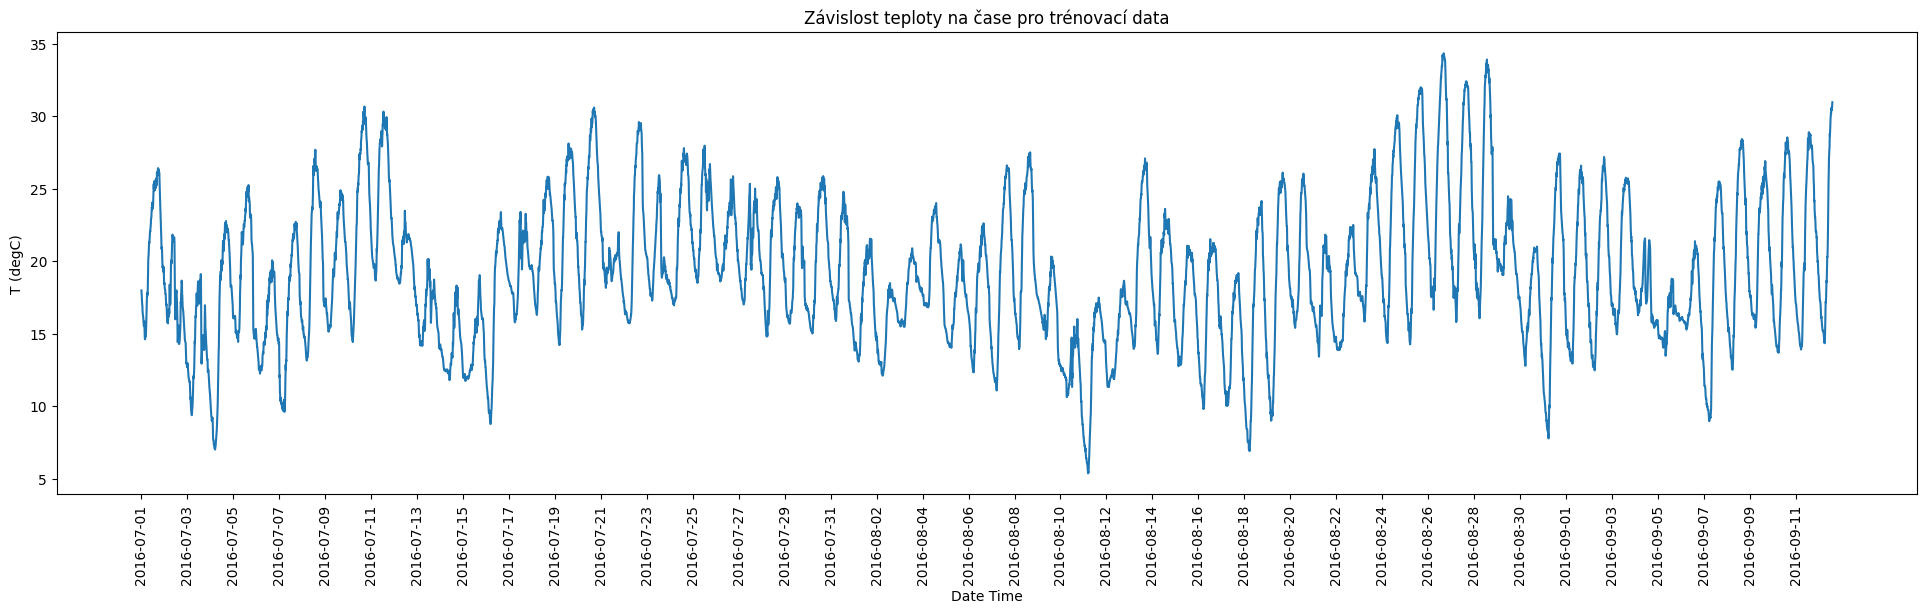

In [3]:
# vizualizace trénovacích dat
# graf závislosti teploty na čase pro trénovací data a na ose x zobrazuj jen každou 288. hodnotu
x = train.index
y = train.values
plt.figure(figsize=(24, 6))
plt.plot(x, y)
plt.xlabel('Date Time')
plt.ylabel('T (degC)')
plt.title('Závislost teploty na čase pro trénovací data')
plt.xticks(x[::288],rotation=90)
plt.show()


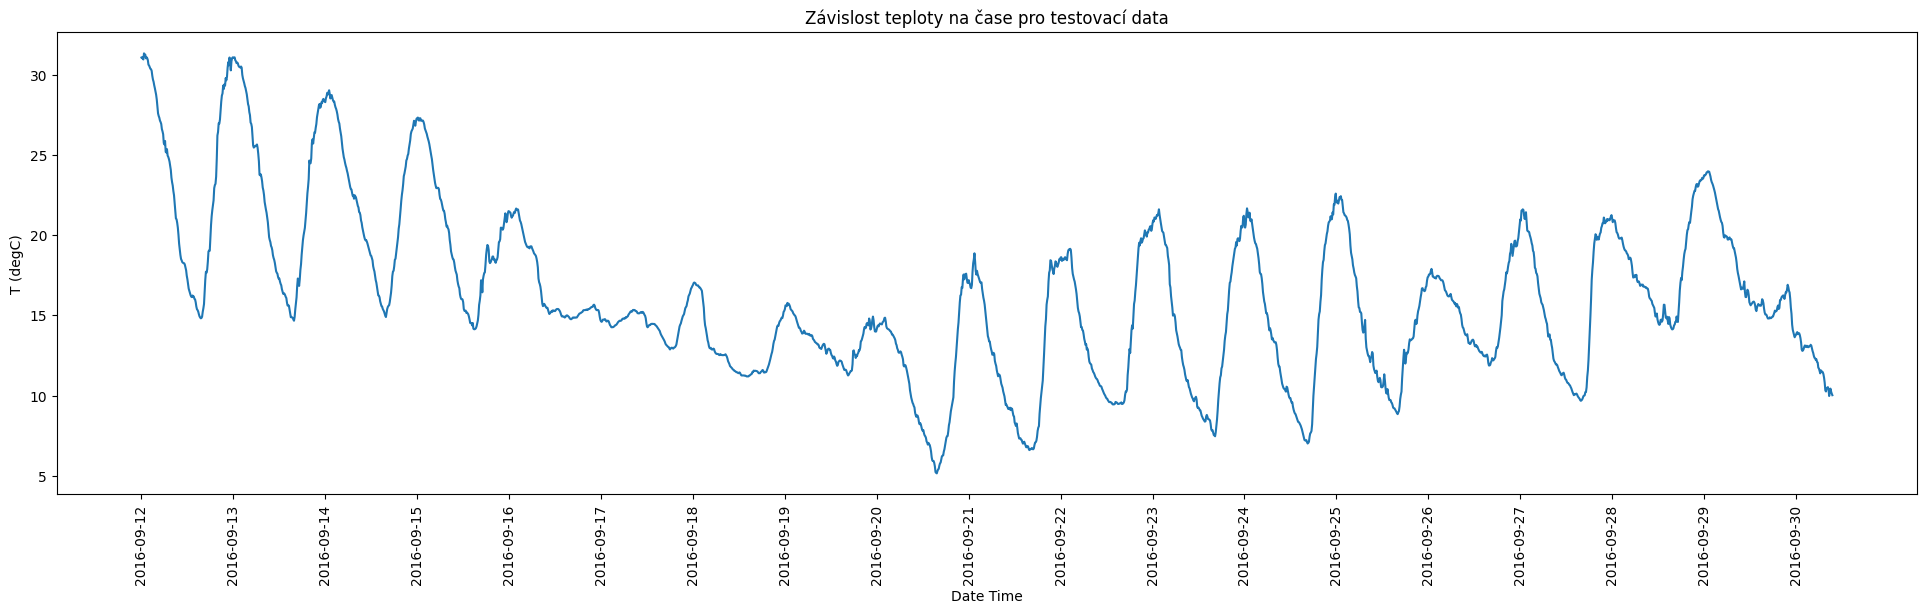

In [4]:
# vizualizace testovacích dat
# graf závislosti teploty na čase pro testovací data a na ose x zobrazuj jen každou 144. hodnotu
x = test.index
y = test.values
plt.figure(figsize=(24, 6))
plt.plot(x, y)
plt.xlabel('Date Time')
plt.ylabel('T (degC)')
plt.title('Závislost teploty na čase pro testovací data')
plt.xticks(x[::144],rotation=90)
plt.show()


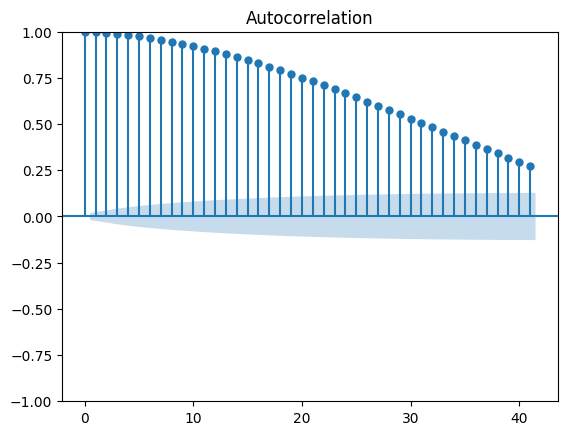

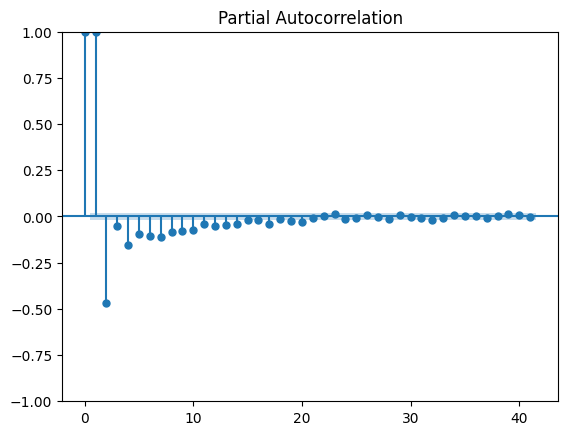

In [5]:
# Určení parametrů ( p ), ( d ) a ( q )
# ( p ) (autoregresivní část): Počet lagů v modelu.
# Můžeš použít ACF (autokorelační funkci) a PACF (parciální autokorelační funkci) grafy k určení vhodného počtu lagů.
# ( d ) (integrovaná část): Počet diferenciací potřebných k dosažení stacionarity. Obvykle začínáme s ( d = 1 ).
# ( q ) (klouzavý průměr): Počet lagů v modelu klouzavého průměru. Opět můžeš použít ACF a PACF grafy.
# Použití ACF a PACF grafů
# trénovací data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train)
plot_pacf(train)
plt.show()

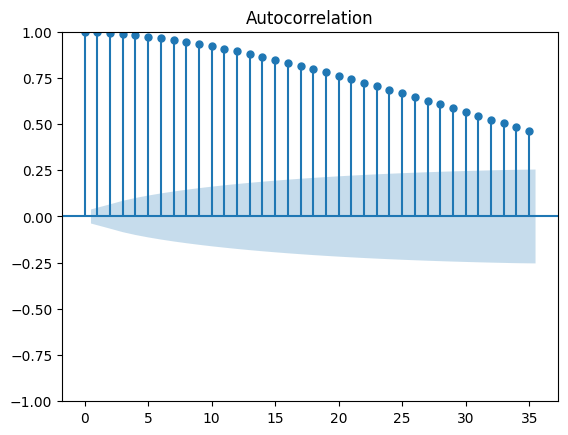

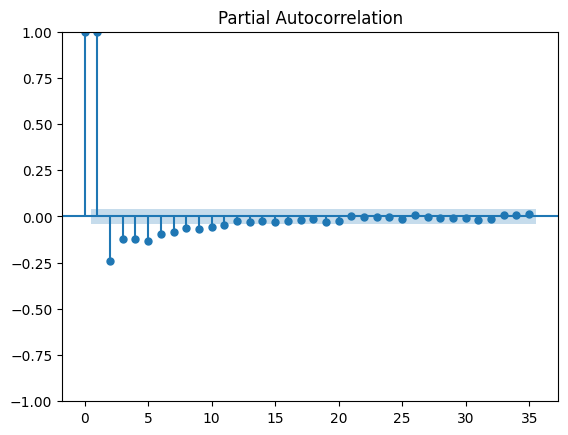

In [6]:
# testovací data
plot_acf(test)
plot_pacf(test)
plt.show()

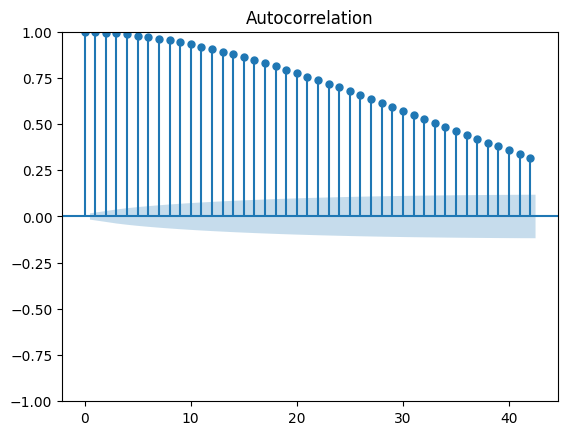

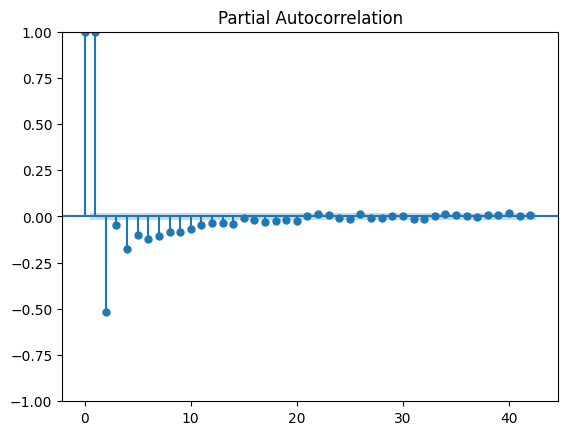

In [7]:
# celý datový soubor
# ACF: Hledáš, kde graf překročí intervaly spolehlivosti (obvykle modré čáry).
# Pokud ACF rychle klesne a zůstane v rámci intervalů, můžeš tento bod považovat za vhodný počet lagů pro ( q )
# PACF: Podobně hledáš, kde graf překročí intervaly spolehlivosti.
# Pokud PACF rychle klesne a zůstane v rámci intervalů, můžeš tento bod považovat za vhodný počet lagů pro ( p )

# ARIMA(( p, d, q ))
# pokud ACF graf vykazuje rychlý pokles po 2 lagách, můžeš zkusit nastavit ( q = 2 )
# pokud PACF graf vykazuje rychlý pokles po 3 lagách, můžeš zkusit nastavit ( p = 3 )
plot_acf(temperature)
plot_pacf(temperature)
plt.show()

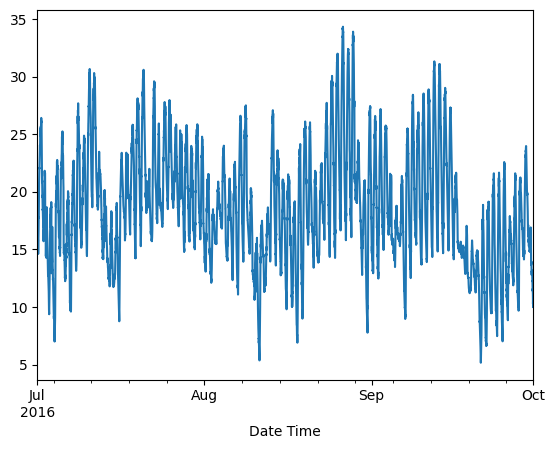


ADF Statistic: -15.634648582713439
p-value: 1.6688455344032162e-28

KPSS Statistic: 0.8523044722143306
p-value: 0.01


C:\Users\JiriK3\AppData\Local\Temp\ipykernel_44376\574774395.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(temperature.dropna(), regression='c')


In [8]:
# zjistit stacionaritu časové řady
# Vizualizace:
# Graf časové řady: Pokud časová řada vykazuje stabilní průměr a rozptyl v čase, může být stacionární.
# Autokorelační funkce (ACF): Pokud ACF rychle klesá k nule, časová řada může být stacionární.
# Statistické testy:
# * Dickey-Fullerův test (ADF test): Testuje hypotézu, že časová řada má jednotkový kořen (nestacionarita). 
#   Nízká p-hodnota (obvykle < 0.05) naznačuje stacionaritu.
# * KPSS test: Testuje hypotézu, že časová řada je stacionární. 
#   Vysoká p-hodnota naznačuje stacionaritu.
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
temperature.plot()
plt.show()
print()

# ADF test
# result = adfuller(df['value'].dropna())
result = adfuller(temperature.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print()
# KPSS test
result = kpss(temperature.dropna(), regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])


In [9]:
# Vytvoření a trénování ARIMA modelu
# Parametry:
# 720: počet autoregresivních (AR) termů. Model se bude snažit předpovědět hodnotu na základě 720 předchozích hodnot (5 dnů)
# 0: počet diferenciací (I), které jsou potřebné k dosažení stacionarity časové řady
# 0: počet klouzavých průměrů (MA) termů
# model je tedy specifikován třemi parametry: AR (autoregresivní část), I (integrovaná část) a MA (klouzavý průměr)
# a používá 5 autoregresivních termů, 1 diferenciaci a žádné klouzavé průměry

model = ARIMA(train, order=(720, 0, 0))
model_fit = model.fit()

# predikce
predictions = model_fit.forecast(steps=len(test))
test.index = predictions.index  # zarovnání indexů

# vyhodnocení modelu
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# vizualizace predikcí
plt.figure(figsize=(24, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.title('Temperature Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(data.index[::288],rotation=90)
plt.legend()
plt.show()

# Vyhodnocení

Model ARIMA dává použitelné výsledky předpovědí s dobrou přesností v závislosti na nastavení parametrů ( p ), ( d ) a ( q ). 
Při pokusu o předpověď na základě 72 předchozích hodnot (12 hodin) dochází rychlému útlumu a výsledky predikce jsou dobré 
v horizontu zhruba na dalších 12 hodin. Při p = 144 (24 hodin) je útlum ke klouzavému průměru pomalejší a predikce dobrá na
1-2 dny, ale doba zpracování významně roste. 

# Použití

Pro predikci teplot na 1-2 dny dopředu